# Problem

- MPS at zero. High risk.
- No understanding of basic summary statistics

# Import

In [21]:
def import_data_local():
    import pandas as pd
    file_path = '/Users/patricksweeney/Desktop/Data dump/Data dump.xlsx'
    data = pd.read_excel(file_path)
    
   # columns_to_remove = ['paid_signup', 'converted']  # Replace with your column names
    #data = data.drop(columns=columns_to_remove, axis=1)

    return data

data = import_data_local()
data.head()

,Time,BSB / Account Number,Transaction Type,Payee,Description,Category,Tags,Subtotal (AUD),Currency,Subtotal (Transaction Currency),Round Up (AUD),Total (AUD),Payment Method,Settled Date
0,2023-01-31T19:26:24+11:00,633-123 / 180877078,Purchase,Uber Eats,"PAYPAL *UBEREATS AU,4029357733",Takeaway,NaN,-26.63,AUD,-26.63,0.37,-27.0,NaN,2023-02-02
1,2023-01-31T18:02:36+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-41.41,AUD,-41.41,0.59,-42.0,NaN,2023-02-01
2,2023-01-31T17:22:08+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-32.32,AUD,-32.32,0.68,-33.0,NaN,2023-02-01
3,2023-01-31T12:22:20+11:00,633-123 / 180877078,Purchase,Bourke Street Bakery,"BOURKE ST BAKERY P L, NSWNSW",Restaurants & Cafes,NaN,-4.04,AUD,-4.04,0.96,-5.0,NaN,2023-02-02
4,2023-01-31T10:31:01+11:00,633-123 / 180877078,Purchase,Vodafone,"Vodafone Australi,North Sydney",Mobile Phone,NaN,-349.98,AUD,-349.98,0.02,-350.0,NaN,2023-02-02


### Format data

In [22]:
def format_date(data, date):
    import pandas as pd
    # Importing pandas inside the function as per your preference
    import pandas as pd

    # Define the format of the date string
    format_string = "%Y-%m-%dT%H:%M:%S%z"

    # Convert the specified column in 'data' to datetime objects
    data[date] = pd.to_datetime(data[date], format=format_string)
    return data

# Example usage
# Assuming 'data' is your DataFrame and 'date_column' is the name of the column to be converted
data = format_date(data, 'Time')
data.head()

/var/folders/_3/qcd4flhx2ss47cf1zvclnv540000gn/T/ipykernel_21993/1725430440.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data[date] = pd.to_datetime(data[date], format=format_string)


,Time,BSB / Account Number,Transaction Type,Payee,Description,Category,Tags,Subtotal (AUD),Currency,Subtotal (Transaction Currency),Round Up (AUD),Total (AUD),Payment Method,Settled Date
0,2023-01-31 19:26:24+11:00,633-123 / 180877078,Purchase,Uber Eats,"PAYPAL *UBEREATS AU,4029357733",Takeaway,NaN,-26.63,AUD,-26.63,0.37,-27.0,NaN,2023-02-02
1,2023-01-31 18:02:36+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-41.41,AUD,-41.41,0.59,-42.0,NaN,2023-02-01
2,2023-01-31 17:22:08+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-32.32,AUD,-32.32,0.68,-33.0,NaN,2023-02-01
3,2023-01-31 12:22:20+11:00,633-123 / 180877078,Purchase,Bourke Street Bakery,"BOURKE ST BAKERY P L, NSWNSW",Restaurants & Cafes,NaN,-4.04,AUD,-4.04,0.96,-5.0,NaN,2023-02-02
4,2023-01-31 10:31:01+11:00,633-123 / 180877078,Purchase,Vodafone,"Vodafone Australi,North Sydney",Mobile Phone,NaN,-349.98,AUD,-349.98,0.02,-350.0,NaN,2023-02-02


In [23]:
def filter_income(data, column_name):
    # Filter the DataFrame to include only rows where the specified column has positive values
    filtered_data = data[data[column_name] < 0]
    return filtered_data

# Example usage:
# Assuming 'data' is your DataFrame and 'income_column' is the name of the column to be filtered
data = filter_income(data, 'Subtotal (AUD)')
data.head()


,Time,BSB / Account Number,Transaction Type,Payee,Description,Category,Tags,Subtotal (AUD),Currency,Subtotal (Transaction Currency),Round Up (AUD),Total (AUD),Payment Method,Settled Date
0,2023-01-31 19:26:24+11:00,633-123 / 180877078,Purchase,Uber Eats,"PAYPAL *UBEREATS AU,4029357733",Takeaway,NaN,-26.63,AUD,-26.63,0.37,-27.0,NaN,2023-02-02
1,2023-01-31 18:02:36+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-41.41,AUD,-41.41,0.59,-42.0,NaN,2023-02-01
2,2023-01-31 17:22:08+11:00,633-123 / 180877078,Purchase,The Carrington,"The Carrington, Surry Hills",Restaurants & Cafes,NaN,-32.32,AUD,-32.32,0.68,-33.0,NaN,2023-02-01
3,2023-01-31 12:22:20+11:00,633-123 / 180877078,Purchase,Bourke Street Bakery,"BOURKE ST BAKERY P L, NSWNSW",Restaurants & Cafes,NaN,-4.04,AUD,-4.04,0.96,-5.0,NaN,2023-02-02
4,2023-01-31 10:31:01+11:00,633-123 / 180877078,Purchase,Vodafone,"Vodafone Australi,North Sydney",Mobile Phone,NaN,-349.98,AUD,-349.98,0.02,-350.0,NaN,2023-02-02


# Basic summary statistics

- Total spend
- Total transactions
- ATV (and MAD of ATV)


In [55]:
import pandas as pd
import numpy as np

def summary_statistics(data, date, value, category=None):
    # Importing pandas and numpy inside the function
    import pandas as pd
    import numpy as np

    # Convert date column to datetime in UTC
    data[date] = pd.to_datetime(data[date], utc=True)

    # Function to calculate MAD
    def calculate_mad(series):
        return np.mean(np.abs(series - series.mean()))

    # Check if a category is specified for grouping
    if category is not None:
        # Group by the specified category
        grouped = data.groupby(category).agg({value: ['sum', 'count', 'mean']}).dropna()

        # Iterate through each category and print the statistics
        for cat, group in grouped.iterrows():
            total_spend = group[value]['sum']
            num_transactions = group[value]['count']
            atv = group[value]['mean']

            # Calculating MAD of the ATV for the category
            mad_atv = calculate_mad(data.loc[data[category] == cat, value])

            # Print the results for each category
            print(f'Category: {cat}')
            print(f'Total Spend: ${int(total_spend)}')
            print(f'Number of Transactions: {int(num_transactions)}')
            print(f'Average Transaction Value: ${round(atv, 2)}')
            print(f'MAD of ATV: ${round(mad_atv, 2)}\n')
    
    else:
        # Aggregate data without category
        total_spend = data[value].sum()
        num_transactions = data[value].count()
        atv = data[value].mean()

        # Calculating MAD of the ATV for overall data
        mad_atv = calculate_mad(data[value])

        # Print the overall results
        print('Overall Statistics:')
        print(f'Total Spend: ${int(total_spend)}')
        print(f'Number of Transactions: {int(num_transactions)}')
        print(f'Average Transaction Value: ${round(atv, 2)}')
        print(f'MAD of ATV: ${round(mad_atv, 2)}\n')

# Example usage:
summary_statistics(data, 'Time', 'Subtotal (AUD)', None)


Overall Statistics:
Total Spend: $-117713
Number of Transactions: 1950
Average Transaction Value: $-60.37
MAD of ATV: $75.25



# Breakdown of categories

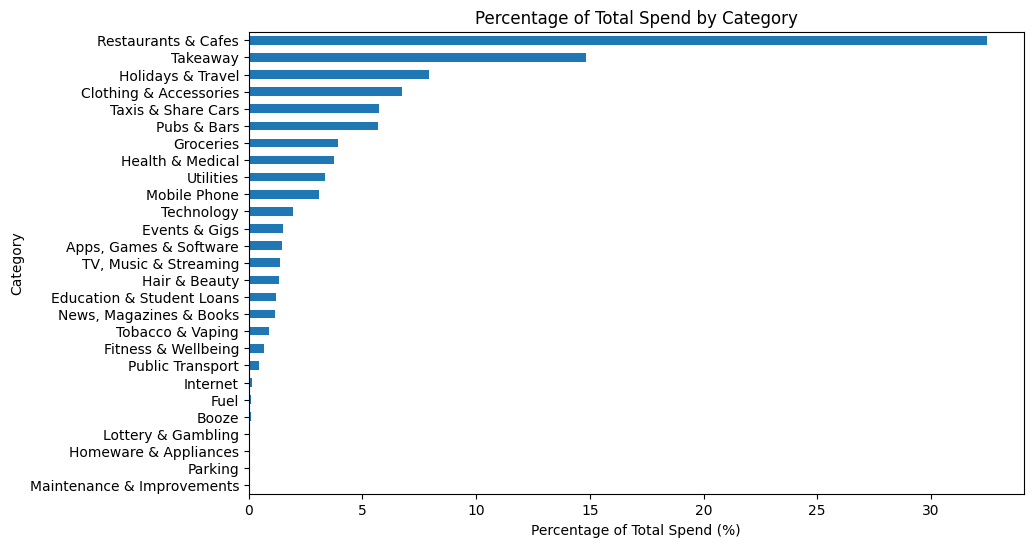

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def breakdown(data, date, value, category):
    # Importing libraries inside the function
    import pandas as pd
    import matplotlib.pyplot as plt

    if date is not None:
        # Convert date column to datetime
        data[date] = pd.to_datetime(data[date])

        # Create a new column for the quarter
        data['Quarter'] = data[date].dt.to_period('Q')

        # Setting up the figure for subplots
        fig, axes = plt.subplots(4, 1, figsize=(10, 24))

        # Iterate through each quarter
        for i, quarter in enumerate(data['Quarter'].unique(), start=1):
            quarter_data = data[data['Quarter'] == quarter]
            
            # Calculate the sum of 'value' for each category in the quarter
            category_sum = quarter_data.groupby(category)[value].sum()

            # Calculate the percentage of each category
            total_sum = category_sum.sum()
            category_percentage = (category_sum / total_sum) * 100

            # Sort the categories by percentage in descending order
            category_percentage = category_percentage.sort_values(ascending=False)

            # Plotting for each quarter
            ax = axes[i-1]
            category_percentage.plot(kind='barh', ax=ax)
            ax.set_xlabel('Percentage of Total Spend (%)')
            ax.set_ylabel(category)
            ax.set_title(f'Percentage of Total Spend by Category - {quarter}')
            ax.invert_yaxis()  # To display the highest percentage at the top

        plt.tight_layout()

    else:
        # Aggregate everything without date segmentation
        plt.figure(figsize=(10, 6))
        category_sum = data.groupby(category)[value].sum()
        total_sum = category_sum.sum()
        category_percentage = (category_sum / total_sum) * 100
        category_percentage = category_percentage.sort_values(ascending=False)
        category_percentage.plot(kind='barh')
        plt.xlabel('Percentage of Total Spend (%)')
        plt.ylabel(category)
        plt.title('Percentage of Total Spend by Category')
        plt.gca().invert_yaxis()

    plt.show()

# Example usage:

breakdown(data, date=None, value='Subtotal (AUD)', category='Category')


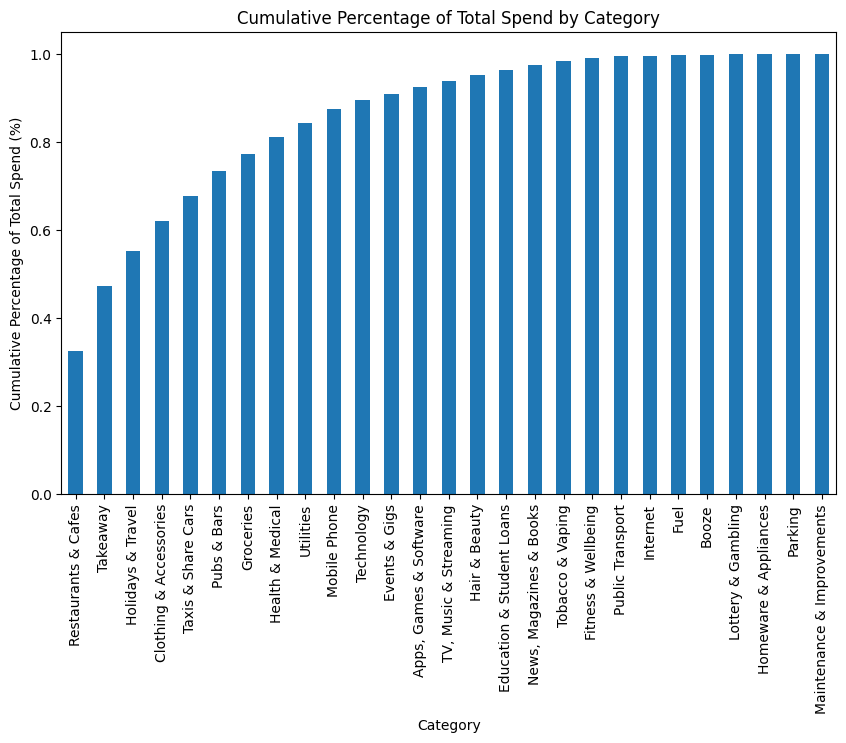

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

def breakdown_whale_chart(data, date, value, category):
    # Importing libraries inside the function
    import pandas as pd
    import matplotlib.pyplot as plt

    # Aggregate the data
    category_sum = data.groupby(category)[value].sum()

    # Calculate the percentage of each category
    total_sum = category_sum.sum()
    category_percentage = (category_sum / total_sum).sort_values(ascending=False)

    # Calculate cumulative percentage
    cumulative_percentage = category_percentage.cumsum()

    # Plotting
    plt.figure(figsize=(10, 6))
    cumulative_percentage.plot(kind='bar')
    plt.xlabel(category)
    plt.ylabel('Cumulative Percentage of Total Spend (%)')
    plt.title('Cumulative Percentage of Total Spend by Category')
    plt.show()

# Example usage:
breakdown_whale_chart(data, date=None, value='Subtotal (AUD)', category='Category')


# Time series

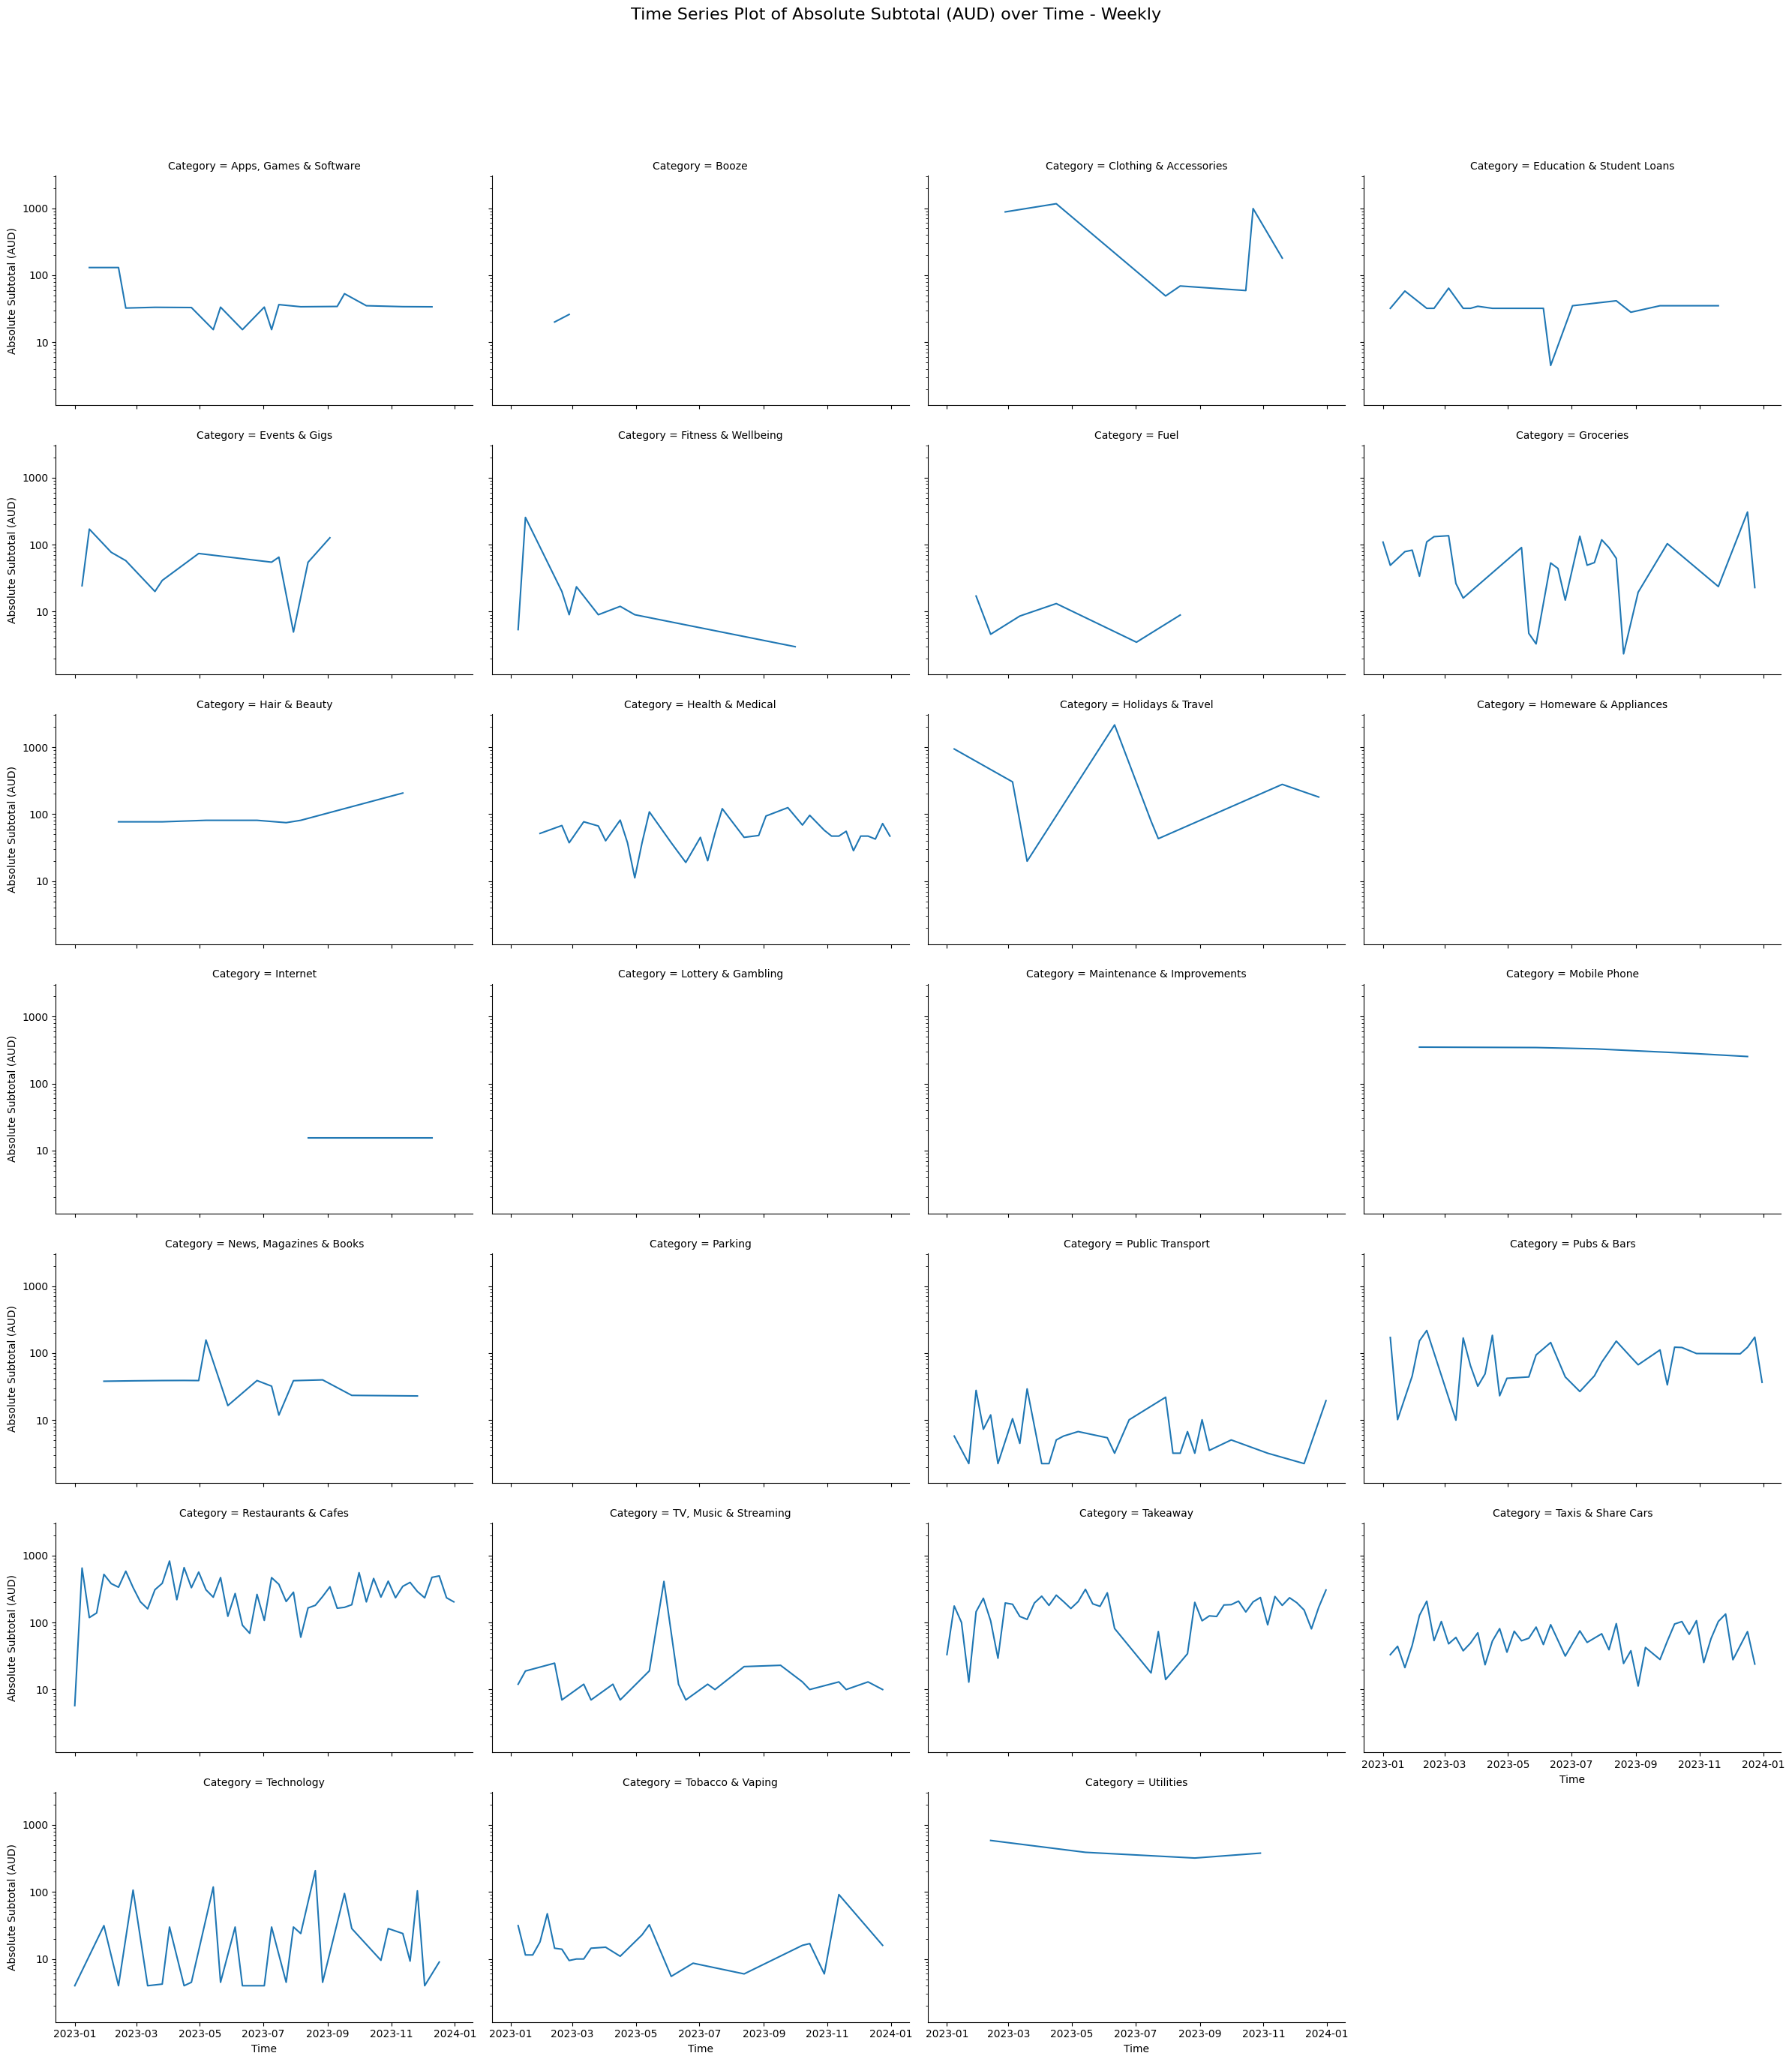

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def time_series(data, date, value, cut=None, log10=False, agg=None):
    # Importing libraries inside the function
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Making a copy of the data to avoid modifying the original DataFrame
    plot_data = data.copy()

    # Converting the specified column to absolute values
    plot_data[value] = plot_data[value].abs()

    # Convert date column to datetime in UTC
    plot_data[date] = pd.to_datetime(plot_data[date], utc=True)

    # Aggregation based on the 'agg' parameter
    if agg is not None:
        # Resampling frequencies
        freq_map = {'Daily': 'D', 'Weekly': 'W', 'Monthly': 'M'}
        freq = freq_map.get(agg)

        # Group by 'cut' if specified, and then resample and sum
        if cut is not None:
            plot_data = plot_data.groupby([cut, pd.Grouper(key=date, freq=freq)])[value].sum().reset_index()
        else:
            plot_data = plot_data.resample(freq, on=date)[value].sum().reset_index()

    if cut is not None:
        # Creating a FacetGrid for multiple subplots if 'cut' is specified
        g = sns.FacetGrid(plot_data, col=cut, col_wrap=4, height=4, aspect=1.5)
        g.map(sns.lineplot, date, value)

        # Adjusting each subplot if log scale is required
        if log10:
            for ax in g.axes:
                ax.set_yscale('log')
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:g}'.format(y)))

        # Setting titles and labels
        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Time Series Plot of Absolute {value} over {date} - {agg}', fontsize=16)
        g.set_axis_labels(date, f'Absolute {value}')

    else:
        # Creating a single plot if 'cut' is None
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=plot_data, x=date, y=value)

        # Setting log scale for y-axis if required
        if log10:
            plt.yscale('log')
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:g}'.format(y)))

        # Setting the plot title and labels
        plt.title(f'Time Series Plot of Absolute {value} over {date} - {agg}')
        plt.xlabel(date)
        plt.ylabel(f'Absolute {value}')

    # Displaying the plot
    plt.show()

# Example usage:
time_series(data, 'Time', 'Subtotal (AUD)', cut='Category', log10=True, agg='Weekly')


# Distributions

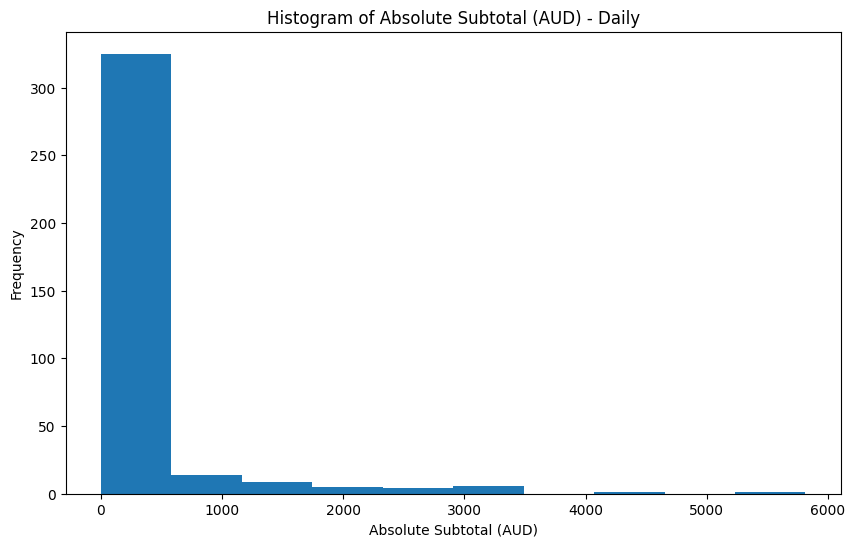

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def histogram(data, date, value, cut=None, log10=False, agg=None):
    # Importing libraries inside the function
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Making a copy of the data to avoid modifying the original DataFrame
    plot_data = data.copy()

    # Converting the specified column to absolute values
    plot_data[value] = plot_data[value].abs()

    # Convert date column to datetime in UTC
    plot_data[date] = pd.to_datetime(plot_data[date], utc=True)

    # Aggregation based on the 'agg' parameter
    if agg is not None:
        # Resampling frequencies
        freq_map = {'Daily': 'D', 'Weekly': 'W', 'Monthly': 'M'}
        freq = freq_map.get(agg)

        # Group by 'cut' if specified, and then resample and sum
        if cut is not None:
            plot_data = plot_data.groupby([cut, pd.Grouper(key=date, freq=freq)])[value].sum().reset_index()
        else:
            plot_data = plot_data.resample(freq, on=date)[value].sum().reset_index()

    if cut is not None:
        # Creating a FacetGrid for multiple subplots if 'cut' is specified
        g = sns.FacetGrid(plot_data, col=cut, col_wrap=4, height=4, aspect=1.5)
        g.map(plt.hist, value)

        # Adjusting each subplot if log scale is required
        if log10:
            for ax in g.axes:
                ax.set_yscale('log')
                ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:g}'.format(y)))

        # Setting titles and labels
        g.fig.subplots_adjust(top=0.9)
        g.fig.suptitle(f'Histogram of Absolute {value} - {agg}', fontsize=16)
        g.set_axis_labels(f'Absolute {value}', 'Frequency')

    else:
        # Creating a single plot if 'cut' is None
        plt.figure(figsize=(10, 6))
        plt.hist(plot_data[value])

        # Setting log scale for y-axis if required
        if log10:
            plt.yscale('log')
            plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:g}'.format(y)))

        # Setting the plot title and labels
        plt.title(f'Histogram of Absolute {value} - {agg}')
        plt.xlabel(f'Absolute {value}')
        plt.ylabel('Frequency')

    # Displaying the plot
    plt.show()

# Example usage:
histogram(data, 'Time', 'Subtotal (AUD)', cut=None, log10=False, agg='Daily')
